In [ ]:
import matplotlib.pyplot as plot 

In [10]:
import pandas as pd
import numpy as np
import sys

# Vectors

This notebook uses many images from the excellent [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/) from [Jay Alammar](https://jalammar.github.io/).

## Axes

Axes == dimension

i.e. three axes == three dimensions

## Scalars, vectors, matricies and tensors

See Chapter 2 of [Deep Learning](https://www.deeplearningbook.org/).

Being specific about how we use these terms (there is no solid concensus - many people (including me) will use array and/or tensor).

### Scalar

$\textit{x}$

- single number
- lowercase, italic $\textit{x}$
- point

### Vector

$\textbf{x} = \begin{bmatrix}x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold 
- $x_{1}$ = first element
- line

### Matrix

$\textbf{A}_{2, 2} = \begin{bmatrix}A_{1, 1} & A_{1, 2} \\ A_{2, 1} & A_{2, 2}\end{bmatrix}$

- two dimensional
- uppercase, bold $\textbf{A}_{m, n}$
- $A_{1, 1}$ = first element
- area

### Tensor

- n-dimensional
- 3 = volume
- uppercase, bold $\textbf{A}_{i,j,k}$

## When `numpy`

Linear algebra, data processing

Pandas sits on top of `numpy`:

In [13]:
type(pd.DataFrame([1, 2]).values)

numpy.ndarray

## What is `numpy`

Library for working with n-dimensional data
- **store and operate on data using C structures**

<img src="assets/c.png" alt="" width="350"/>

## Why `numpy`

Functionality - There is nothing that cannot be done with python lists that can be done with numpy arrays. It is sometimes just nicer to use
- vector, matrix & tensor operations

Uses less memory
- fixed data types (can also be a drawback)

Speed
- fixed data types (benefit from static typing)
- C implementation

Below we implement a sum operation using a Python loop:

In [22]:
def loop(left, right):
    data = np.zeros(left.shape[0])
    for i in range(data.shape[0]):
        data[i] = left[i] + right[i]
    return data

 = np.arange(1_000_000)
right = np.arange(1_000_000)

res = %timeit -qo loop(left, right)
"{:.2f} seconds".format(res.average)

'0.39 seconds'

In [25]:
res = %timeit -qo left + right
"{:.2f} seconds".format(res.average)

'0.00 seconds'

Now lets try it using `numpy` addition:

Numpy arrays also take way storage compared to python lists, consider that example:

Note that not only is `numpy` quicker, it is **more readable**!

The reason that `numpy` is faster is **vectorization**
- running multiple operations from a single instruction

Many CPU's have operation that run in parallel (modern x86 chips have the SSE instructions)

Vectorization is
- the process of rewriting a loop 
- instead of processing a single element of an array N times
- it processes 4 elements of the array simultaneously N/4 times

## `list` versus `np.array`

Python list
- general-purpose container - can hold different data types
- support (fairly) efficient insertion, deletion, appending, and concatenation
- list comprehensions make them easy to construct and manipulate
- only a few list operations can be carried out in C (because of the need for type checking)
- the list holds pointers to items scattered across memory

Numpy array
- **only one data type**
- less flexible
- vectorized operations
- fixed size
- data in one place in memory

Only holding one data type means that numpy can efficiently store data in memory

A list doesn't know what the next object will be - this makes storing it in memory challenging

```python
[0, 1.0, '2.0']
```

We can make an array from a list - `numpy` will make assumptions about what datatype the array should hold:

In [43]:
a = np.array([10, 20.0, 0])

In [44]:
a[0] = "Test"

ValueError: could not convert string to float: 'Test'

We can see the data type by accessing the `.dtype` attribute:

In [78]:
ml_case = pd.DataFrame({
    "pct_class": [1, 2, 3]
})

ml_case.loc[:, "pct_class"] = ml_case.loc[:, "pct_class"].astype(str)
pd.get_dummies(ml_case)

,pct_class_1,pct_class_2,pct_class_3
0,1,0,0
1,0,1,0
2,0,0,1


We can change the datatype of an array:

In [75]:
test_df = pd.DataFrame({
    "Column_1": np.array([10, 20]).astype(int),
    "Column_2": np.array([234, 12]).astype(float)
})

test_df_2 = pd.DataFrame({
    "Column_1": np.array([10, 20]).astype(int),
    "Column_3": np.array([24, 3.4]).astype(float)
})

pd.merge(
    left=test_df,
    right=test_df_2,
    on=["Column_1"]
)

,Column_1,Column_2,Column_3
0,10,234.0,24.0
1,20,12.0,3.4


In [72]:
test_df.dtypes

Column_1      int64
Column_2    float64
dtype: object

In [71]:
test_df.describe()

,Column_1,Column_2
count,2.000000,2.000000
mean,15.000000,123.000000
std,7.071068,156.977705
min,10.000000,12.000000
25%,12.500000,67.500000
50%,15.000000,123.000000
75%,17.500000,178.500000
max,20.000000,234.000000


In [48]:
np.array([10, 20.0]).astype(int)

array([10, 20])

## For Sam

Is integer or float larger

In [79]:
sys.getsizeof(np.array([1, 2, 3]))

104

In [82]:
sys.getsizeof(np.array([1.0, 2.0, 3.0]))

120

Note that changing the datatype will by default create a newly allocated array (new location in memory) - you can control this using a an argument:

In [83]:
np.array([10, 20.0], copy=False).astype(int)

array([10, 20])

We can see the number of elements in an array:

In [84]:
np.array([10, 20.0, 30]).size

3

For a vector the size will be the same as the shape:

In [92]:
np.array([10, 20.0, 30])

array([10., 20., 30.])

We can also get the number of elements in a vector using the Python bulitin `len`:

In [93]:
len(np.array([10, 20.0, 30]))

3

## Vectors

$\begin{bmatrix}x_{1} & x_{2} & \cdots & x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold $\textbf{x}$
- $x_{1}$ = first element
- line

We can visualize a vector as a line:

In [94]:
data = np.array([4, 3, 5, 4, 2])

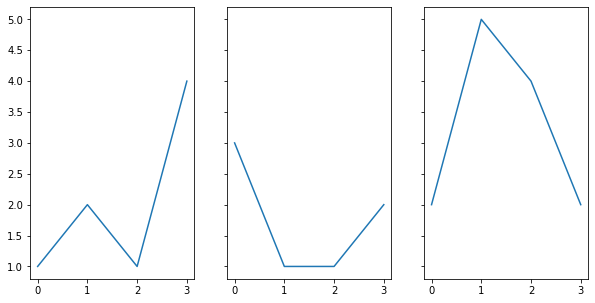

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

stuff_list = [
    [1, 2, 1, 4],
    [3, 1, 1, 2],
    [2, 5, 4, 2],
]
number_of_plots = len(stuff_list)
fig, axs = plt.subplots(figsize=(10, 5), ncols=number_of_plots, sharey=True)

for i in range(number_of_plots):
    sns.lineplot(x=list(range(len(stuff_list[i]))), y=stuff_list[i], ax=axs[i])

## Vector Arithmetic

In Python when we add iterables together they are joined:

In [116]:
[0, 1, 2] + [1]

[0, 1, 2, 1]

`numpy` works differently - addition works **element wise**:

<img src="assets/add.png" alt="" width="300"/>

All of the logic above holds for subtraction, multiplication etc:

Common problem to multiply every number of a list with a scalar represents way more work using lists compared to np arrays

In [123]:
np_array = np.array([1, 2, 3])
list_stuff = [1, 2, 3]

number = 2

np_array * number
[num * number for num in list_stuff if num != 2]

[2, 6]

In [124]:
test = ["_name", "_name1", "name2"]
[n for n in test if "_" in n]

['_name', '_name1']

Next to vector summing, of course it is also possible to take the product

## Broadcasting

The smaller array will be broadcast across the larger array

<img src="assets/broad.png" alt="" width="300"/>

In [125]:
np.array([1, 2]) * 1.6

array([1.6, 3.2])

Note how different adding lists together is:

In [150]:
a = np.array([
    [1, 2],
    [4, 5],
    [6, 7]
])

In [151]:
a * np.array([2, 3])

array([[ 2,  6],
       [ 8, 15],
       [12, 21]])

Broadcasting is important because the larger array **keep its shape**
- matrix multiplication (ie dot products) often result in differently shaped arrays

In [142]:
test_df = pd.DataFrame({
    "Column_2": [1, 2, 40],
    "Column_1": [1, 2, 3],
})

In [144]:
test_df.loc[:, "Column_1"]

0    1
1    2
2    3
Name: Column_1, dtype: int64

In [129]:
np.array([1, 2, 3])[0:2]

array([1, 2])

## Working in a single dimension

Vectors - flat lists

### Indexing

<img src="assets/idx.png" alt="" width="500"/>

### Aggregation

<img src="assets/agg.png" alt="" width="800"/>

## Practical 

Calculate the absolute difference between the sum of squared numbers between 1 and 100 and the square of their sum, once in pure python and with numpy arrays: 
$$ |(1^2 + 2^2 + 3^2 + ...) - (1 + 2 + 3 + ...)^2|$$ 


### Pure python:

In [157]:
list100 = list(range(100+1))
squared_sum = sum([num ** 2 for num in list100])
sum_squared = sum(list100) ** 2

abs(squared_sum - sum_squared)

25164150

### Numpy array

In [164]:
list100 = np.arange(np.add(100, 1))
squared_sum = np.sum(np.square(list100))
sum_squared = np.square(list100.sum())

np.abs(np.subtract(squared_sum, sum_squared))

25164150

## Answers:
You are encouraged to look at the solutions after you gave it a serious try 

## Vector norms

Size of a vector

Function that maps from a vector to a non-negative scalar

$||x||_{p} = \left( \sum |x|^{p} \right)^{\frac{1}{p}} $

A common operation in machine learning is **gradient clipping** - this can be done by clipping by value, norm or global norm
- global norm will keep their relative scale 

We can do a norm in `numpy` using:

## Making vectors

`np.arange` - similar to the Python builtin `range`

`np.linspace` - evenly spaced between two points

In [167]:
np.linspace(0, 100, 9)

array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ])

## Sampling random uniform

This can be done two ways
- `np.random.random`
- `np.random.rand`

Only difference is the shape argument is not a tuple
- saves writing the brackets

Sample uniformly across the interval [0, 1)

In [168]:
np.random.random((2, 4))

array([[0.70757143, 0.20174317, 0.90228424, 0.22786531],
       [0.54590766, 0.89008305, 0.32708449, 0.5058572 ]])

## Sample from a standard normal

`np.random.randn`

$\mathcal{N}(0,1)$

In [169]:
np.random.randn(2, 5)

array([[ 1.78795403e-01, -1.15398946e+00,  3.17967236e-01,
        -7.54915172e-04, -2.41962131e-01],
       [ 7.97799557e-01,  9.86592305e-01, -2.48256333e-01,
        -5.51799110e-01,  1.01010671e+00]])

## Sample from a Gaussian

`np.random.normal`

$\mathcal{N}(\mu,\sigma)$

We choose the statistics (mean & standard deviation)

## Changing order of a numpy array
In case the order of the array is desired to be reversed, there are intuitive commands for that

In [176]:
array = np.array([[1, 2, 3]])
np.fliplr(array)

array([[3, 2, 1]])

## Find the diagonal

In [179]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
np.diag(np.fliplr(matrix))

array([3, 5, 7])

# Practical: Finding the biggest product

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

<img src="assets/number.png" alt="" width="500"/>

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

### Potential approach
1. Getting the numbers in a workable format - (from string to integers, in a list, etc)
2. Writing a loop to extract a 4x4 matrix of the grid
3. Writing a function to calculate all potential products

In [180]:
num = ("""
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48""".replace("\n", " "))

In [201]:
splitted_num = np.array(num.split())
reshaped_num = splitted_num.reshape(-1, 20)
int_type_num = reshaped_num.astype(int)

array([ 8, 49, 81, 52])

In [230]:
def find_highest_product(array: np.array) -> int:
    product = np.max([
        # Rows
        np.max(np.prod(array, axis=1)),
        # Columns
        np.max(np.prod(array, axis=0)),
        # Diagonal
        np.prod(np.diag(array)),
        # Reverse diagonal
        np.prod(np.diag(np.fliplr(array)))
    ])
    return product

In [232]:
NUM_ROWS = 20
ADJACENT_NUMBERS = 4
max_product = -np.inf

In [239]:
last_element = NUM_ROWS - ADJACENT_NUMBERS + 1  # Plus one for right indexing
for i in range(last_element):
    i_start = i
    i_end = i + ADJACENT_NUMBERS
    for j in range(last_element):
        j_start = j
        j_end = j + ADJACENT_NUMBERS
        subset_matrix = int_type_num[i_start:i_end, j_start:j_end]
        tmp_max = find_highest_product(subset_matrix)

        if tmp_max > max_product:
            max_product = tmp_max

print(max_product)

70600674


## Answer:
Here you can check whether your results matches the solutions. You are encouraged to look at the code after you gave it a serious try

In [185]:
np.reshape(num.split(), (20, -1))

array([['08', '02', '22', '97'],
       ['49', '49', '99', '40'],
       ['81', '49', '31', '73'],
       ['52', '70', '95', '23']], dtype='<U2')

In [242]:
array

array([[49, 99, 40],
       [49, 31, 73],
       [70, 95, 23]])

In [245]:
array.diagonal()

array([49, 31, 23])

In [ ]:
# Change the format of the numbers to an np array which you can index - meaning matrix[0:4, 0:4]


# Write a function that inputs a 4x4 and returns the max product


# Loop over the matrix and return every 4x4 combination

